# PROYECTO FINAL SPRINT 11 - SURE TOMORROW INSURANCE COMPANY

## 1. DESCRIPCIÓN GENERAL

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.

### 1.1 TAREAS

- `Tarea 1`: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.

- `Tarea 2`: predecir si es probable que un nuevo cliente reciba un beneficio de seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo simple?

- `Tarea 3`: predecir la cantidad de beneficios de seguro que probablemente recibirá un nuevo cliente utilizando un modelo de regresión lineal.

- `Tarea 4`: proteger los datos personales de los clientes sin romper el modelo de la tarea anterior.

### 1.2 OBJETIVO DEL PROYECTO

Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. 

Esto se denomina enmascaramiento de datos u ofuscación de datos, pero los datos deben protegerse de tal manera que la calidad de los modelos de machine learning no se vea afectada. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.

### 1.3 INSTRUCCIONES DEL PROYECTO

1. Carga los datos.

2. Verifica que los datos no tengan problemas: no faltan datos, no hay valores extremos, etc.

3. Trabaja en cada tarea y responde las preguntas planteadas en la plantilla del proyecto.

4. Saca conclusiones basadas en tu experiencia trabajando en el proyecto.

## 2. ABRIR Y LEER LOS DATOS

### 2.1 IMPORTAR LAS LIBRERÍAS

In [1]:
# Importar las librerias
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
import math

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

### 2.2 CARGA Y VISUALIZACIÓN DE DATOS

In [2]:
# Carga de datos en la variable 'df'
df = pd.read_csv('insurance_us.csv')

In [3]:
# Visualización general del DS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
# Reenombrar las columnas para que el codigo se vea mas coherente con su estilo
df = df.rename(columns = 
               {'Gender': 'gender', 
                'Age': 'age', 
                'Salary': 'income', 
                'Family members': 'family_members', 
                'Insurance benefits': 'insurance_benefits'}
                )

In [5]:
# Visualizar una muestra de los datos
df.sample(10)

,gender,age,income,family_members,insurance_benefits
3756,0,39.0,33200.0,2,0
2026,1,40.0,44500.0,0,0
1312,1,37.0,27000.0,1,0
564,0,30.0,39100.0,0,0
1501,1,28.0,56100.0,0,0
4271,0,20.0,35700.0,1,0
209,0,22.0,40100.0,1,0
343,0,25.0,54900.0,1,0
4290,0,19.0,39300.0,1,0
4450,1,24.0,36700.0,2,0


In [6]:
# Cambiar el tipo de datos a int
df[['age', 'income']] = df[['age', 'income']].astype(int)

In [7]:
# Comprobar por duplicados en los datos
df.duplicated().sum()

153

In [8]:
# Calcular el porcentaje de duplicados
print(df.duplicated().sum() / df.shape[0] * 100, "%")

3.06 %


In [9]:
# Eliminar los valores duplicados ya que son realmente pocos 
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
# Obtener algunos datos estadisticos
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [11]:
# Obtener el tamaño del dataset
df.shape

(4847, 5)

In [12]:
# Comprobar todos los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              4847 non-null   int64
 1   age                 4847 non-null   int32
 2   income              4847 non-null   int32
 3   family_members      4847 non-null   int64
 4   insurance_benefits  4847 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 151.6 KB


**COMENTARIOS**

- La calidad general de los datos es buena.
- No hay valores faltantes en ninguna de las columnas.
- Los datos están razonablemente distribuidos, lo que se indica por la proximidad entre la media y la mediana (50%).
- Hemos eliminado con éxito el 3.06 por ciento de datos duplicados.
- El conjunto de datos actual contiene 5 columnas y 4,847 filas.

## 3. ANÁLISIS EXPLORATORIO DE DATOS

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

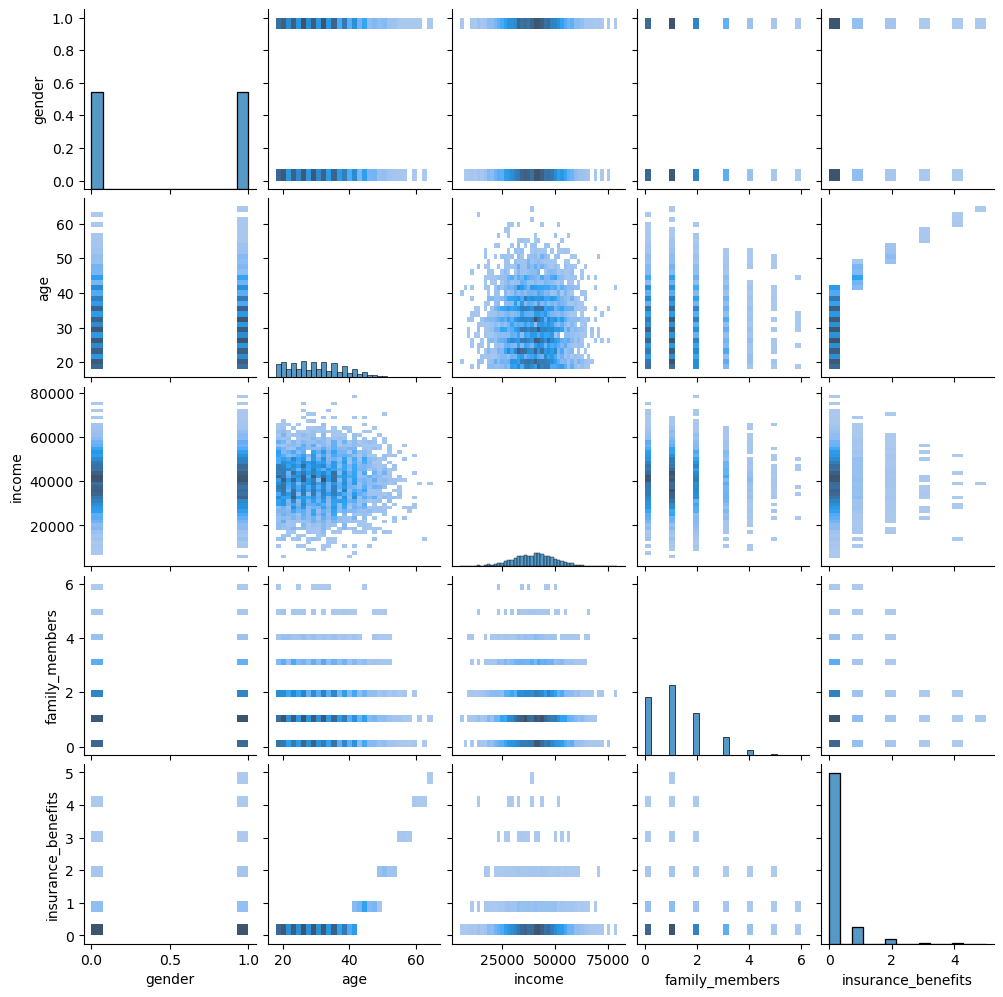

In [13]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(10, 10)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

### 3.1 TAREA 1 - CLIENTES SIMILARES

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [14]:
# Crea una función para mostrar los k vecinos más cercanos
feature_names = ['gender', 'age', 'income', 'family_members']
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos    
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric, algorithm='brute')
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [15]:
# Escalado de caracteristicas
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [16]:
# Muestra datos de ejemplo de los resultados del escalado
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2191,0,0.292308,0.400000,0.500000,0
3059,0,0.492308,0.654430,0.166667,0
3444,0,0.369231,0.383544,0.333333,0
2900,0,0.676923,0.586076,0.000000,1
2334,0,0.292308,0.596203,0.333333,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

#### 3.1.1 METRICA EUCLIDIANA

In [17]:
# Implementa la función en el conjunto de datos df usando la métrica euclidiana
get_knn(df, 1, 5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000,1,1,0.000000
3810,0,40,38000,0,0,6.082763
4796,1,37,38000,1,0,9.055385
2480,1,36,38000,0,0,10.099505
3498,0,33,38000,0,0,13.038405


In [18]:
# Implementa la función en el conjunto de datos df_scaled usando la métrica euclidiana.
get_knn(df_scaled, 1, 5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1,0,0.707692,0.481013,0.166667,1,0.000000
4041,0,0.707692,0.477215,0.166667,1,0.003797
1835,0,0.707692,0.492405,0.166667,1,0.011392
4833,0,0.723077,0.491139,0.166667,1,0.018418
4341,0,0.692308,0.459494,0.166667,1,0.026453


#### 3.1.2 METRICA MANHATTAN

In [19]:
# Implementa la función en el conjunto de datos df usando la métrica manhattan
get_knn(df, 1, 5, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000,1,1,0.0
3810,0,40,38000,0,0,7.0
4796,1,37,38000,1,0,10.0
2480,1,36,38000,0,0,12.0
3498,0,33,38000,0,0,14.0


In [20]:
# Implementa la función en el conjunto de datos df_scaled usando la métrica manhattan
get_knn(df_scaled, 1, 5, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
1,0,0.707692,0.481013,0.166667,1,0.000000
4041,0,0.707692,0.477215,0.166667,1,0.003797
1835,0,0.707692,0.492405,0.166667,1,0.011392
4833,0,0.723077,0.491139,0.166667,1,0.025511
2394,0,0.676923,0.482278,0.166667,1,0.032035


**COMENTARIOS**

**¿Afectan los datos no escalados al algoritmo kNN? Si tiene un efecto, ¿qué forma toma?**

- Los datos no escalados afectan significativamente el rendimiento del algoritmo kNN. Al comparar datos no escalados con datos escalados, se producen resultados diferentes.
- Específicamente, la columna objetivo (`insurance_benefits`) en los datos no escalados conduce a predicciones incorrectas, ya que algunos puntos de objeto que deberían tener un valor de 1 en la columna objetivo se agrupan con otros puntos que tienen un valor objetivo de 0.
- En contraste, escalar los datos proporciona resultados más precisos.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?**

- Los resultados obtenidos con las métricas de distancia Euclidiana y Manhattan son generalmente similares para los datos no escalados, con diferencias principalmente en los valores de distancia debido a sus distintos métodos de cálculo.
- Sin embargo, para los datos escalados, las dos métricas arrojan resultados diferentes, particularmente en la selección del quinto punto más cercano. La métrica `euclidean` selecciona un punto de índice diferente (4341) en comparación con la métrica `manhattan` (2394).

### 3.2 TAREA 2 - ¿ES PROBABLE QUE EL CLIENTE RECIBA UNA PRESTACIÓN DEL SEGURO?

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

#### 3.2.1 PREPARANDO LA COLUMNA OBJETIVO

In [21]:
# Calcula y verifica la distribución de los valores objetivo
df['insurance_benefits'].value_counts()

insurance_benefits
0    4284
1     423
2     114
3      18
4       7
5       1
Name: count, dtype: int64

Para simplificar la clasificación, los valores de la columna objetivo que estén por encima de 1 se cambiarán a 1.

In [22]:
# Simplifica la columna objetivo (target)
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] == 0, 0, 1)

#### 3.2.2 VERIFICAR EL BALANCE DE LA CLASE OBJETIVO

insurance_benefits_received
0    4284
1     563
Name: count, dtype: int64

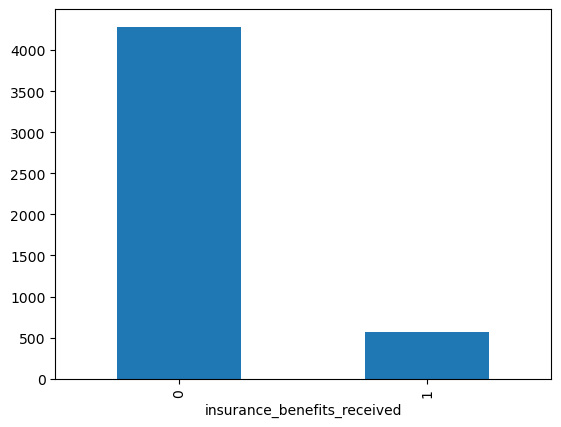

In [23]:
# Verifica el desbalance de clases con value_counts()
display(df['insurance_benefits_received'].value_counts())
df['insurance_benefits_received'].value_counts().plot(kind='bar')

plt.show()

La clase está desbalanceada. La mayoría de los clientes no presentan reclamos de seguro.

#### 3.2.3 PREPARAR FUNCIONES PARA CLASIFICACIÓN BASADA EN KNN

In [24]:
# Crea funciones y mide la calidad del modelo con métricas F1
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Error Matrix')
    print(cm)

#### 3.2.4 VERIFICAR EL PUNTAJE DE UN MODELO ALEATORIO DUMMY

In [25]:
# Generar la salida de un modelo aleatorio
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

El modelo debería generar "1" con ciertas probabilidades. Vamos a probar el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar algún beneficio de seguro, 0.5 y 1.

In [26]:
# Probar el modelo aleatorio predictivo
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df), seed=42) 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probability: 0.00
F1: 0.00
Error Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

Probability: 0.12
F1: 0.13
Error Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

Probability: 0.50
F1: 0.19
Error Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

Probability: 1.00
F1: 0.21
Error Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



#### 3.2.5 DIVIDIR LOS CONJUNTOS DE DATOS DE ENTRENAMIENTO Y PRUEBA CON UNA PROPORCIÓN DE 70:30

In [27]:
# Train test split
y = df['insurance_benefits_received']
X = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

#### 3.2.6 CREAR MODELO PARA CONJUNTO DE DATOS NO ESCALADO

In [28]:
# Crear un modelo para examinar el valor F1 en datos no escalados
model1 = sklearn.neighbors.KNeighborsClassifier()
model1.fit(X_train, y_train)
predict_test = model1.predict(X_test)

In [29]:
# Implementar la función eval_classifier previamente creada
eval_classifier(y_test, predict_test)

F1: 0.23
Error Matrix
[[0.87766323 0.00687285]
 [0.09965636 0.01580756]]


#### 3.2.7 REALIZAR PRUEBAS DEL MODELO EN DATOS ESCALABLES

In [30]:
# Escalar los datasets
scaler = sklearn.preprocessing.MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Construir el modelo basado en datasets escalables
model2 = sklearn.neighbors.KNeighborsClassifier()
model2.fit(X_train_scaled, y_train)
predict_test_sc = model2.predict(X_test_scaled)

In [32]:
# Implementar la función eval_classifier previamente creada
eval_classifier(y_test, predict_test_sc)

F1: 0.90
Error Matrix
[[0.87972509 0.004811  ]
 [0.01786942 0.0975945 ]]


**COMENTARIOS**

- Los modelos que utilizan conjuntos de datos escalados muestran valores de precisión significativamente más altos en comparación con los modelos que utilizan datos no escalados.
- Además, los modelos con conjuntos de datos escalados superan a los modelos ficticios en cuanto a precisión.

### 3.3 TAREA 3 - REGRESIÓN (CON REGRESIÓN LINEAL) 

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [33]:
# Crea la clase MyLinearRegression para la implementación de regresión lineal
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # Add units
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y) 

    def predict(self, X):
        
        # Add units
        X2 = np.append(np.ones([X.shape[0], 1]), X, axis=1) 
        y_pred = np.dot(X2, self.weights) 
        
        return y_pred

In [34]:
# Crea la función eval_regressor para calcular el rendimiento del modelo de regresión
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')

#### 3.3.1 EVALUACIÓN DE RMSE PARA DATOS NO ESCALADOS 

In [35]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366679e-01  3.58042290e-02  1.95594897e-02  5.85335011e-07
 -1.21618426e-02]
RMSE: 0.36
R2: 0.66


#### 3.3.2 EVALUACIÓN DE RMSE PARA DATOS ESCALADOS

In [36]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736668  2.32727489  0.01955949  0.04624147 -0.07297106]
RMSE: 0.36
R2: 0.66


**COMENTARIOS**

- Los valores de RMSE y $R^2$ no muestran diferencias significativas entre los modelos con datos no escalados y escalados.
- Los valores relativamente bajos de RMSE indican que el modelo se desempeña con precisión tanto en datos no escalados como escalados.
- El valor de $R^2$ de 0.66 se encuentra en la categoría moderada, lo que indica un componente de error relativamente bajo.

### 3.4 TAREA 4 - OFUSCAR DATOS

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [37]:
# Crear un nuevo dataframe con información personalizada
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [38]:
# Convertir el dataframe de Pandas a NumPy array
X = df_pn.to_numpy()

In [39]:
# Crear una matriz aleatoria P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [40]:
# Muestra la matriz aleatoria P
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

**PREGUNTA** Comprobar que la matriz P sea invertible

In [41]:
# Invertir el valor P
P_inv = np.linalg.inv(P)
P_inv

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [42]:
# Comprobar que la matriz aleatoria P sea invertible
np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

True

**RESPUESTA** Verdadero

**PREGUNTA** ¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [43]:
# Datos antes de la transformación
X

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]], dtype=int64)

In [44]:
# Datos después de la transformación
X_trans = X.dot(P)
X_trans

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

**RESPUESTA** Los datos transformados no nos permiten adivinar los datos originales.

**PREGUNTA**

¿Puedes recuperar los datos originales de  𝑋′
  si conoces  𝑃
 ? Intenta comprobarlo a través de los cálculos moviendo  𝑃
  del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [45]:
# Recuperación de datos
X_rec = X_trans.dot(P_inv)
X_rec

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-3.18323146e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [ 1.36424205e-12,  2.90000000e+01,  2.10000000e+04,
         0.00000000e+00],
       ...,
       [ 4.54747351e-13,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

**RESPUESTA** Sí, los datos originales pueden ser restaurados usando el valor inverso de la matriz \( P \).

**PREGUNTA**

Muestra los tres casos para algunos clientes: 

- Datos originales
- El que está transformado 
- El que está invertido (recuperado)

In [46]:
# Original data
pd.DataFrame(X, columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [47]:
# Data después de la transformación
pd.DataFrame(X_trans, columns=personal_info_column_list).head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [48]:
# Data invertido (recuperado)
pd.DataFrame(X_rec, columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-3.183231e-12,46.0,38000.0,1.000000e+00
2,1.364242e-12,29.0,21000.0,0.000000e+00
3,-3.637979e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,3.637979e-12


**PREGUNTA** Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

**RESPUESTA** Los datos recuperados en las columnas `gender` y `family_members` producen valores ligeramente diferentes en comparación con los datos originales.

Esta discrepancia probablemente se debe a errores de aritmética de punto flotante. Cuando se realizan cálculos que involucran números con escalas muy diferentes, como números muy grandes y muy pequeños, la precisión del valor más pequeño puede perderse debido a la diferencia en las escalas. Este fenómeno se conoce como error de punto flotante.

En nuestro caso, las diferentes escalas en cada columna pueden llevar a pequeñas distorsiones en los datos recuperados, lo que causa las pequeñas discrepancias observadas en las columnas `gender` y `family_members`.

## 4. PRUEBA DE QUE LA OFUSCACIÓN DE DATOS PUEDE FUNCIONAR CON REGRESIÓN LINEAL

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**`RESPUESTA:`**

**Demostración Analítica: Impacto de la Ofuscación de Datos en las Predicciones de Regresión Lineal**

Dada la fórmula de regresión lineal para calcular los pesos (\(w\)):
$$
w = (X^T X)^{-1} X^T y
$$

Después de la ofuscación de datos, tenemos \(X \times P\) en lugar de \(X\). Por lo tanto, los nuevos pesos (\(w_P\)) pueden calcularse como:
$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Ahora, nuestro objetivo es demostrar que \(w_P\) no alterará los valores predichos en comparación con \(w\) original obtenido de datos no ofuscados.

**PASO 1:** Expresar \(w\) en términos de \(w_P\) y \(P\):

Para lograr esto, necesitamos realizar algunas manipulaciones con \(w_P\):

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Expandiendo los productos de matrices:

$$
w_P = (P^T X^T X P)^{-1} P^T X^T y
$$

Dado que \(P\) es una matriz invertible, podemos reescribir la ecuación como:

$$
w_P = P^{-1} (X^T X)^{-1} P^{-1} P^T X^T y
$$

Notando que \(P^{-1} P = I\) (la matriz identidad):

$$
w_P = P^{-1} (X^T X)^{-1} X^T y
$$

Dado que \(w = (X^T X)^{-1} X^T y\), tenemos:

$$
w_P = P^{-1} w
$$

**PASO 2:** Implicaciones de \(w_P = P^{-1} w\):

La ecuación \(w_P = P^{-1} w\) muestra que los pesos obtenidos a partir de los datos ofuscados (\(w_P\)) están directamente relacionados con los pesos obtenidos a partir de los datos originales (\(w\)) a través de la inversa de la matriz de ofuscación \(P\). Esto implica que multiplicar los pesos originales por la inversa de la matriz de ofuscación (\(P^{-1}\)) nos dará los pesos (\(w_P\)) obtenidos a partir de los datos ofuscados.

**PASO 3:** Predicciones usando \(w_P\):

Ahora, veamos cómo la predicción usando \(w_P\) está relacionada con la predicción original usando \(w\):

Predicción original usando \(w\):
$$
\hat{y} = Xw
$$

Predicción usando \(w_P\):
$$
\hat{y}_P = XPw_P
$$

Sustituyendo \(w_P = P^{-1} w\):

$$
\hat{y}_P = XP (P^{-1} w)
$$

La regla de multiplicación de matrices nos permite simplificar \(XP(P^{-1})\) a \(X\), resultando en:

$$
\hat{y}_P = Xw = \hat{y}
$$

**COMENTARIOS**

La demostración muestra que las predicciones usando los pesos originales (\(w\)) y los pesos obtenidos a partir de los datos ofuscados (\(w_P\)) son exactamente las mismas. Por lo tanto, la ofuscación de datos no afecta los valores predichos en la regresión lineal; las predicciones permanecen sin cambios desde sus resultados iniciales.

## 5. PRUEBA DE REGRESIÓN LINEAL CON OFUSCACIÓN DE DATOS

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.


**Procedimiento**

1. Crea una matriz cuadrada $P$ de números aleatorios.
2. Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
3. Utiliza $XP$ como la nueva matriz de características

Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

In [49]:
# Crea una matriz cuadrada P
rng = np.random.default_rng(seed=12345)
P2 = rng.random(size=(X.shape[1], X.shape[1]))

In [50]:
# VerificaR si la matriz es invertible
np.allclose(np.dot(P2, np.linalg.inv(P2)), np.dot(np.linalg.inv(P2), P2))

True

Crear un Modelo de Regresión Lineal: 

In [51]:
# Utiliza datos iniciales que estén escalados pero que no estén ofuscados (sin P2)
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736668  2.32727489  0.01955949  0.04624147 -0.07297106]
RMSE: 0.36
R2: 0.66


In [52]:
# Usando datos iniciales no escalados, pero ofuscados (con P2)
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(np.dot(X, P2), y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train_P, y_train_P)
print(lr.weights)

y_test_pred_P = lr.predict(X_test_P)
eval_regressor(y_test_P, y_test_pred_P)

[-0.97736647 -0.05106671  0.0270203   0.05239127 -0.00431844]
RMSE: 0.36
R2: 0.66


Los puntajes de precisión en ambos modelos son exactamente iguales.

## 6. CONCLUSIONES

En este proyecto, exploramos las aplicaciones prácticas del álgebra lineal en el análisis de datos, lo que resultó altamente beneficioso para resolver problemas del mundo real en ciencia de datos. A lo largo del proyecto, llevamos a cabo los siguientes procesos:

1. Utilizamos el algoritmo `kNearestNeighbors` (kNN) para identificar clientes similares a un objeto de cliente específico, empleando métricas de distancia Euclidiana y Manhattan.
2. Investigamos el impacto del escalado de datos en el algoritmo kNN, revelando que los datos escalados producían resultados significativamente diferentes en comparación con los datos no escalados.
3. Probamos el rendimiento del algoritmo kNN utilizando conjuntos de datos de entrenamiento y prueba, encontrando que los datos escalados alcanzaron valores de precisión notablemente más altos que los datos no escalados.
4. Realizamos pruebas de modelo con el algoritmo de `Regresión Lineal` y descubrimos que no había una diferencia significativa en los puntajes de precisión entre datos escalados y no escalados.
5. Exploramos la ofuscación de datos en características numéricas, utilizando métodos algebraicos lineales. Si bien los datos ofuscados hacían que los datos originales fueran irreconocibles, se podían restaurar con el conocimiento del valor inverso de la métrica P, destacando la importancia de la *invertibilidad*.
6. Demostramos analíticamente que los datos ofuscados siguen siendo utilizables para el análisis con el algoritmo de `Regresión Lineal`, al mostrar la equivalencia matemática entre los datos originales y los datos ofuscados.
7. Confirmamos que la `Regresión Lineal` funciona de manera efectiva en datos ofuscados, como lo demuestran los valores de precisión de `RMSE` y $R^2$ coincidentes.

A través de estos procesos, hemos demostrado la importancia del álgebra lineal en la ciencia de datos y su capacidad para respaldar diversas tareas analíticas, incluido el análisis de similitud de datos, la evaluación de modelos y la ofuscación de datos.

## A. LISTA DE CONTROL

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores- 
- [x]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [x]  Se ha realizado la tarea 1
    - [x]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [x]  Se probó el procedimiento para las cuatro combinaciones propuestas    
    - [x]  Se respondieron las preguntas sobre la escala/distancia
    - [x]  Se ha realizado la tarea 2
    - [x]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    
    - [x]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.
    - [x]  Se ha realizado la tarea 3
    - [x]  Se implementó la solución de regresión lineal mediante operaciones matriciales    
    - [x]  Se calculó la RECM para la solución implementada
    - [x]  Se ha realizado la tarea 4
    - [x]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    
    - [x]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    
    - [x]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    
    - [x]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM
    - [x]  Se han sacado conclusiones

## B. APÉNDICES

### B.1 ESCRIBIR FÓRMULAS EN LOS CUADERNOS DE JUPYTER

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

### B.2 PROPIEDADES DE LAS MATRICES

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>A(B+C)=AB+AC</td>
</tr>
<tr>
<td>No conmutatividad</td><td>AB \neq BA</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>(AB)C = A(BC)</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>IA = AI = A</td>
</tr>
<tr>
<td></td><td>A^{-1}A = AA^{-1} = I
</td>
</tr>    
<tr>
<td></td><td>(AB)^{-1} = B^{-1}A^{-1}</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>(AB)^T = B^TA^T</td>
</tr>    
</table>